In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

from Mod.Fits import Fits

In [46]:
with open("Data/stima tempo caratteristico.csv", "r") as file:
    df = pd.read_csv(file, delimiter=";", decimal=",")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3039 entries, 0 to 3038
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Position (mm) Run #1  3039 non-null   float64
dtypes: float64(1)
memory usage: 23.9 KB


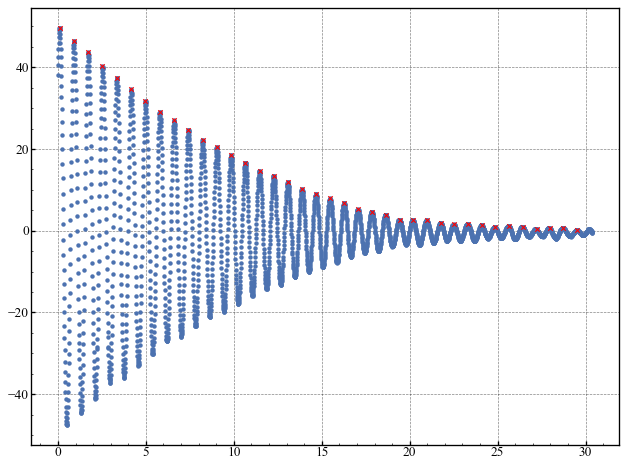

In [47]:
plt.style.use("Mod/mystyle.mplstyle")

fig, ax = plt.subplots()

X = np.linspace(0, 30.39, 3039)
Y = df.iloc[:, 0].to_numpy()

peaks, _ = scipy.signal.find_peaks(Y, prominence=1)

ax.scatter(X, Y)
ax.scatter(peaks / 100, Y[peaks], color="r", marker="x")

In [48]:
Periods = (peaks[1:] - peaks[:-1]) / 100

omegas = 2 * np.pi / Periods

average_omega = omegas.mean()
std_omega = omegas.std()

print(f"Omega_0: {average_omega: 5.2f} ± {std_omega: 5.2f}")

Omega_0:  7.90 ±  0.23


In [49]:
params, std_dev = Fits.smorzato(X, Y)
params2, std_dev2 = Fits.smorzato2(X, Y, average_omega)

print(f"Parametri C_2=0: {params},\nStd_dev: {std_dev}\n")
print(f"Parametri C_1=0: {params2},\nStd_dev: {std_dev2}\n")

Parametri C_2=0: [54.81785173  0.12507536  7.75124984 -0.81058281 -0.2536261 ],
Std_dev: [0.24193439 0.00079466 0.00080738 0.00455734 0.044372  ]

Parametri C_1=0: [ 6.01602313e+01  6.72919260e-03 -4.53578891e+01 -3.22551315e-01],
Std_dev: [1.54433412e+00 1.95988818e-04 1.30389477e-02 1.51593812e-01]



In [50]:
print(
    f"Curva1 gamma: {params[1]}, omega: {params[2]}\n\tDa cui gamma^2/omega^2: {params[1]**2/params[2]**2}"
)
print(
    f"Curva2 gamma: {params2[1]}, omega: {average_omega}\n\tDa cui gamma^2/omega^2: {params2[1]**2/average_omega**2}"
)

print("Quindi sono trascurabili")

Curva1 gamma: 0.12507536138328035, omega: 7.751249843311912
	Da cui gamma^2/omega^2: 0.00026037546682403594
Curva2 gamma: 0.006729192598196687, omega: 7.9031834264716005
	Da cui gamma^2/omega^2: 7.249729352295589e-07
Quindi sono trascurabili


In [51]:
def curve(x, a, b, c, phi, d):
    return a * np.exp(-b * x) * np.cos(c * x + phi) + d


def curve2(x, a, b, phi, c, omega):
    return np.multiply(a / (1 + a * b * x), np.cos(omega * x + phi)) + c

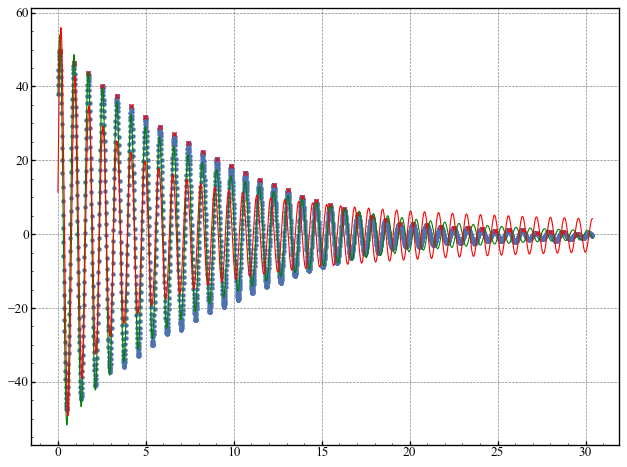

In [52]:
ax.plot(X, curve(X, *params), c="g")
ax.plot(X, curve2(X, *params2, average_omega), c="r")

fig

Inoltre si nota che dopo 20s le oscillazioni cambiano periodo, quindi le scarto

Parametri C_2=0: [53.12182206  0.11485385  7.74858687 -0.80719848 -0.16722056],
Std_dev: [0.21306312 0.00071381 0.00072699 0.00414236 0.04839016]

Parametri C_1=0: [ 5.77448843e+01  5.99554732e-03 -5.79450706e+01 -2.62047463e-01],
Std_dev: [1.78117681e+00 2.27843831e-04 1.56057911e-02 2.25952873e-01]

Curva1 gamma: 0.11485385258537191, omega: 7.7485868722692945
	Da cui gamma^2/omega^2: 0.00021970812715906625
Curva2 gamma: 0.00599554732218338, omega: 7.9031834264716005
	Da cui gamma^2/omega^2: 5.75510891424667e-07
Quindi sono trascurabili


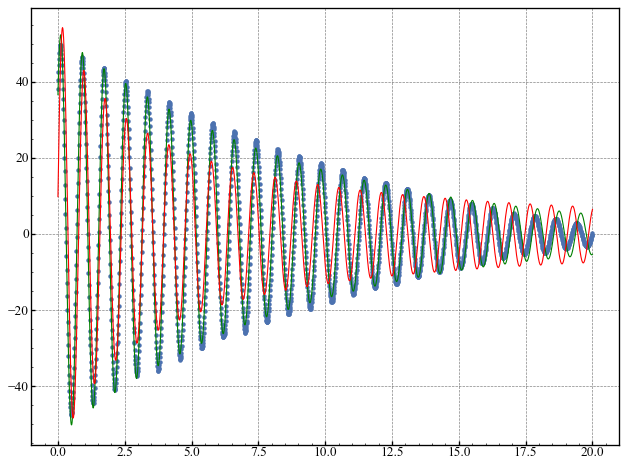

In [53]:
fig, ax = plt.subplots()

X = np.linspace(0, 20, 2000)

params, std_dev = Fits.smorzato(X, Y[:2000])
params2, std_dev2 = Fits.smorzato2(X, Y[:2000], average_omega)

print(f"Parametri C_2=0: {params},\nStd_dev: {std_dev}\n")
print(f"Parametri C_1=0: {params2},\nStd_dev: {std_dev2}\n")

print(
    f"Curva1 gamma: {params[1]}, omega: {params[2]}\n\tDa cui gamma^2/omega^2: {params[1]**2/params[2]**2}"
)
print(
    f"Curva2 gamma: {params2[1]}, omega: {average_omega}\n\tDa cui gamma^2/omega^2: {params2[1]**2/average_omega**2}"
)

print("Quindi sono trascurabili")

ax.scatter(X, Y[:2000])
ax.plot(X, curve(X, *params), c="g")
ax.plot(X, curve2(X, *params2, average_omega), c="r")